# An example that demonstrates global fitting of multiple data sets using shared parameters

### Two functions are demonstrated: scipy.optimize.curve_fit and scipy.optimize.leastsq

In [83]:
%reset 

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [84]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit, leastsq
from functools import partial
%matplotlib inline

In [85]:
# Define the function for signal generation
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

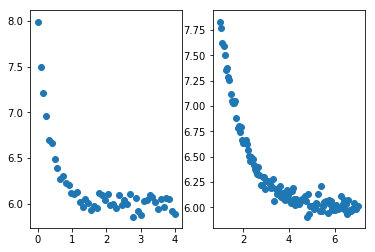

In [86]:
# Generate the data. There are two sets: x0 vs y0 and x1 vs y1. Note they are of different length
# Parameter a and b are different for each data set; parameter c is a shared variable
a0, b0, a1, b1, c = 2, 3, 5, 1, 6          # Parameters for generating the data
noise_level0, noise_level1 = 0.07, 0.05    # Gaussian noise level
x0 = np.linspace(0, 4, 50)
x1 = np.linspace(1, 7, 120)
y0 = func(x0, a0, b0, c) + noise_level0 * np.random.randn(len(x0))
y1 = func(x1, a1, b1, c) + noise_level1 * np.random.randn(len(x1))

_, ax = plt.subplots(1, 2)
ax[0].scatter(x0, y0)
ax[1].scatter(x1, y1)

In [87]:
# Option 1: using curve_fit
# Define the fit function
def func_fit(x, a0, b0, a1, b1, c, n):
    yfit = np.empty(x.shape)
    yfit[:n] = func(x[:n], a0, b0, c)
    yfit[n:] = func(x[n:], a1, b1, c)
    return yfit

# Peform the fit
xdata = np.concatenate((x0, x1))
ydata = np.concatenate((y0, y1))
popt, pcov = curve_fit(partial(func_fit, n=len(x0)), xdata, ydata)

# Check the fit resutls
print("Original parameters: [a0, b0, a1, b1, c] = {}".format((a0, b0, a1, b1, c)))
print("Fit results: [a0, b0, a1, b1, c] = {}".format(popt))

Original parameters: [a0, b0, a1, b1, c] = (2, 3, 5, 1, 6)
Fit results: [a0, b0, a1, b1, c] = [ 1.94187812  2.85942514  4.99273242  1.00771362  6.00428152]


In [88]:
# Option 2: using leastsq
# Define the fit function
def leastsq_function(params, *args):
    a0, b0, a1, b1, c = params
    x, y, n = args
    yfit = np.empty(x.shape)
    yfit[:n] = func(x[:n], a0, b0, c)
    yfit[n:] = func(x[n:], a1, b1, c)

    return y - yfit

# Peform the fit
params0 = [1, 1, 1, 1, 1]
args = (xdata, ydata, len(x0))
result = leastsq(leastsq_function, params0, args=args)

# Check the fit resutls
print("Original parameters: [a0, b0, a1, b1, c] = {}".format((a0, b0, a1, b1, c)))
print("Fit results: [a0, b0, a1, b1, c] = {}".format(result))

Original parameters: [a0, b0, a1, b1, c] = (2, 3, 5, 1, 6)
Fit results: [a0, b0, a1, b1, c] = (array([ 1.94187812,  2.85942514,  4.99273242,  1.00771362,  6.00428152]), 1)
